# Z-Score

**z-score tells us how many standard deviations away a value is from the mean.**

We use the following formula to calculate a z-score:

z = (X – μ) / σ

where:

X is a single raw data value

μ is the population mean

σ is the population standard deviation


**Syntax**

**scipy.stats.zscore(a, axis=0, ddof=0, nan_policy=’propagate’)**

**a :** an array like object containing data

**axis :** the axis along which to calculate the z-scores. Default is 0.

**ddof :** degrees of freedom correction in the calculation of the standard deviation. Default is 0.

**nan_policy :** how to handle when input contains nan. Default is propagate, which returns nan. ‘raise’ throws an error and ‘omit’ performs calculations ignoring nan values.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

arr_1 = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22 ])       # 1-D array
arr_2 = np.array([[5, 6, 7, 7, 8],                            # Multidimensional array
                 [8, 8, 8, 9, 9],
                 [2, 2, 4, 4, 5]])



z_arr_1 = stats.zscore(arr_1)        # Calculating Z-score for arr_1
z_arr_2 = stats.zscore(arr_2, axis=1)        # Calculating Z-score for arr_2

print(f'Z-Score for arr_1\n{z_arr_1.round(3)}')
print(f'\nZ-Score for arr_2\n{z_arr_2.round(3)}')


Z-Score for arr_1
[-1.394 -1.195 -1.195 -0.199  0.     0.     0.398  0.598  1.195  1.793]

Z-Score for arr_2
[[-1.569 -0.588  0.392  0.392  1.373]
 [-0.816 -0.816 -0.816  1.225  1.225]
 [-1.167 -1.167  0.5    0.5    1.333]]


In [ ]:
# Suppose we have a pandas dataframe

np.random.seed(20)
df = pd.DataFrame(np.random.randint(2,50, (5,5)), columns = ['A','B','C','D','E'])

print(df)

# Calculating Z-Score Value
z_df = df.apply(stats.zscore)
print('\n',z_df.round(3))

    A   B   C   D   E
0  37  28  17  33  30
1  28  11  22  13  24
2   9  36  34  42  23
3  28  28  21  18  40
4  40  18  43  39   9

        A      B      C      D      E
0  0.795  0.435 -1.078  0.348  0.475
1 -0.037 -1.513 -0.560 -1.391 -0.119
2 -1.793  1.352  0.684  1.130 -0.218
3 -0.037  0.435 -0.664 -0.956  1.464
4  1.072 -0.710  1.617  0.869 -1.603


# Correlation

**One way to quantify the relationship between two variables is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables.**

**It always takes on a value between -1 and 1**

where

**-1 :** indicates a perfectly negative linear correlation between two variables

**0 :** indicates no linear correlation between two variables

**1 :** indicates a perfectly positive linear correlation between two variables




In [ ]:
#To calculate the correlation between two variables in Python, we can use the Numpy corrcoef() function.

import numpy as np

np.random.seed(20)

#Creating some random Variable
var_1 = np.random.randint(0,10,50)
var_2 = var_1 + np.random.randint(0,10,50)

np.corrcoef(var_1, var_2)

array([[1.        , 0.74815234],
       [0.74815234, 1.        ]])

In [ ]:
#By default, this function produces a matrix of correlation coefficients.
#If we only wanted to return the correlation coefficient between the two variables, we could use the following syntax

np.corrcoef(var_1, var_2)[0,1].round(3)

0.748

In [ ]:
#To test if this correlation is statistically significant,
#we can calculate the p-value associated with the Pearson correlation coefficient by using the Scipy pearsonr() function,
#which returns the Pearson correlation coefficient along with the two-tailed p-value.

from scipy.stats import pearsonr

pearsonr(var_1, var_2)            # Used when we do correltaion test (also known as Correlation test)

#The correlation coefficient is 0.668 and the two-tailed  p-value is 4.24*10^(-10) which is almost zero.
#Since this p-value is less than .05, we would conclude that there is a statistically significant correlation between the two variables.

PearsonRResult(statistic=0.7481523434144554, pvalue=4.243144209037517e-10)

In [ ]:
#If you’re interested in calculating the correlation between several variables in a Pandas DataFrame,
#you can simpy use the .corr() function.

np.random.seed(20)
df_1 = pd.DataFrame(np.random.randint(2,50, (5,5)), columns = ['A','B','C','D','E'])
print(df_1)
print(f'\n{df_1.corr().round(3)}')

    A   B   C   D   E
0  37  28  17  33  30
1  28  11  22  13  24
2   9  36  34  42  23
3  28  28  21  18  40
4  40  18  43  39   9

       A      B      C      D      E
A  1.000 -0.560 -0.061 -0.146 -0.200
B -0.560  1.000 -0.027  0.550  0.374
C -0.061 -0.027  1.000  0.643 -0.832
D -0.146  0.550  0.643  1.000 -0.542
E -0.200  0.374 -0.832 -0.542  1.000


<Axes: >

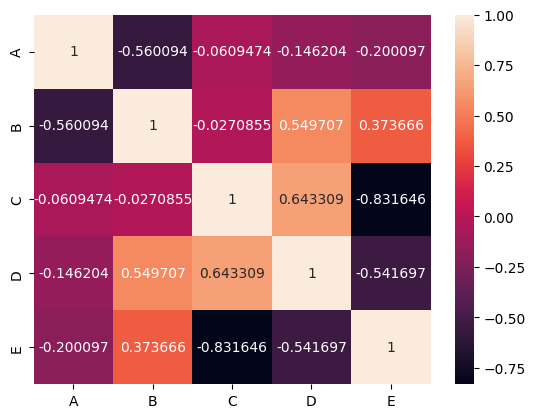

In [ ]:
# Visualizing the Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

v = df_1.corr()

sns.heatmap(v, annot=True, fmt='g')

In [ ]:
# And if you’re only interested in calculating the correlation between two specific variables in the DataFrame, you can specify the variables

df_1['A'].corr(df_1['C'])

-0.06094738944220149

# Covariance

**Covariance is a measure of how changes in one variable are associated with changes in a second variable. Specifically, it’s a measure of the degree to which two variables are linearly associated.**

**A covariance matrix is a square matrix that shows the covariance between many different variables. This can be a useful way to understand how different variables are related in a dataset.**



A positive number for covariance indicates that two variables tend to increase or decrease in tandem. For example, math and science have a positive covariance (33.2), which indicates that students who score high on math also tend to score high on science. Conversely, students who score low on math also tend to score low on science.


A negative number for covariance indicates that as one variable increases, a second variable tends to decrease. For example, math and history have a negative covariance (-24.44), which indicates that students who score high on math tend to score low on history. Conversely, students who score low on math tend to score high on history.

In [ ]:
import numpy as np

math = [84, 82, 81, 89, 73, 94, 92, 70, 88, 95]
science = [85, 82, 72, 77, 75, 89, 95, 84, 77, 94]
history = [97, 94, 93, 95, 88, 82, 78, 84, 69, 78]

data = np.array([math, science, history])

#we’ll create the covariance matrix for this dataset using the numpy function cov(),
#specifying that bias = True so that we are able to calculate the population covariance matrix.

np.cov(data, bias=True)

array([[ 64.96,  33.2 , -24.44],
       [ 33.2 ,  56.4 , -24.1 ],
       [-24.44, -24.1 ,  75.56]])

<Axes: >

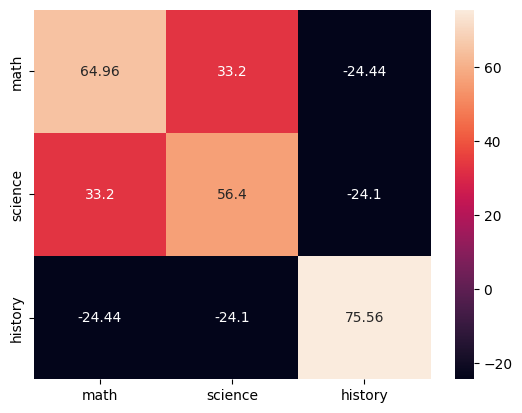

In [ ]:
#Visualizing the Covariance Matrix

import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(data, bias=True)
labs = ['math', 'science', 'history']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)

# Variance.

**The variance is a way to measure the spread of values in a dataset.**

**The formula to calculate population variance is:**

σ2 = Σ (xi – μ)2 / N

where:

Σ: A symbol that means “sum”

μ: Population mean

xi: The ith element from the population

N: Population size

**The formula to calculate sample variance is:**

s2 = Σ (xi – x)2 / (n-1)

where:

x: Sample mean

xi: The ith element from the sample

n: Sample size

You should calculate the population variance when the dataset you’re working with represents an entire population, i.e. every value that you’re interested in.


You should calculate the sample variance when the dataset you’re working with represents a a sample taken from a larger population of interest.


The sample variance of a given array of data will always be larger than the population variance for the same array of a data because there is more uncertainty when calculating the sample variance, thus our estimate of the variance will be larger.

In [ ]:
from statistics import variance, pvariance

data = [4, 8, 12, 15, 9, 6, 14, 18, 12, 9, 16, 17, 17, 20, 14]

#calculate sample variance
var = variance(data)
print(f'Variance : {var}')

#calculate population variance
p_var = pvariance(data)
print(f'Poulation Variance : {p_var}')

Variance : 22.066666666666666
Poulation Variance : 20.595555555555556


# Standard Error of the Mean

**The standard error of the mean is a way to measure how spread out values are in a dataset.**

Standard error of the mean = s / √n

where:

s: sample standard deviation

n: sample size

The larger the standard error of the mean, the more spread out values are around the mean in a dataset.

As the sample size increases, the standard error of the mean tends to decrease.

In [ ]:
from scipy.stats import sem

data_1 = [4, 8, 12, 15, 9, 6, 14, 18, 12, 9, 16, 17, 17, 20, 14]

sem(data_1)

1.2128936932440166

In [ ]:
import numpy as np

data_2 = [4, 8, 12, 15, 9, 6, 14, 18, 12, 9, 16, 17, 17, 20, 14]

np.std(data_2, ddof=1) / np.sqrt(np.size(data_2))     # Using the formula

1.2128936932440166

# Skewness & Kurtosis

skewness and kurtosis are two ways to measure the shape of a distribution.



**Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.**

=> A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.

=> A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.

=> A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.**

=> The kurtosis of a normal distribution is 3.

=> If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.

=> If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

**Syntax**

**skew(array of values, bias=False)**

**kurt(array of values, bias=False)**

We use the argument bias=False to calculate the sample skewness and kurtosis as opposed to the population skewness and kurtosis.

In [ ]:
from scipy import stats

d = [88, 85, 82, 97, 67, 77, 74, 86, 81, 95, 77, 88, 85, 76, 81]


#calculate sample skewness
s = stats.skew(d, bias=False)
print(f'Skewness : {s}')


#calculate sample kurtosis
k = stats.kurtosis(d, bias=False)
print(f'Kurtosis : {k}')


Skewness : 0.0326966578855933
Kurtosis : 0.11815715154945083


# Bayes’ Theorem

Bayes’ Theorem states the following for any two events A and B:

**P(A|B) = P(A)*P(B|A) / P(B)**

where:

P(A|B): The probability of event A, given event B has occurred.

P(B|A): The probability of event B, given event A has occurred.

P(A): The probability of event A.

P(B): The probability of event B.

For example, suppose the probability of the weather being cloudy is 40%.

Also suppose the probability of rain on a given day is 20%.

Also suppose the probability of clouds on a rainy day is 85%.

If it’s cloudy outside on a given day, what is the probability that it will rain that day?

**Solution:**

P(cloudy) = 0.40

P(rain) = 0.20

P(cloudy | rain) = 0.85

Thus, we can calculate:

P(rain | cloudy) = P(rain) * P(cloudy | rain) / P(cloudy)

P(rain | cloudy) = 0.20 * 0.85 / 0.40

P(rain | cloudy) = 0.425

If it’s cloudy outside on a given day, the probability that it will rain that day is 42.5%.

In [ ]:
# Creating a function for bayes thoram based on the formula

def bayesTheorem(pA, pB, pBA):
    return pA * pBA / pB

In [ ]:
#define probabilities
pRain = 0.2
pCloudy = 0.4
pCloudyRain = 0.85

#use function to calculate conditional probability
bayesTheorem(pRain, pCloudy, pCloudyRain)


0.425

#Binomial Distribution

**Binomial dsitribution describes the probability of obtaining k successes in n binomial experiments.**

If a random variable X follows a binomial distribution, then the probability that X = k successes can be found by the following formula:

**P(X=k) = nCk * pk * (1-p)n-k**

where:

n: number of trials

k: number of successes

p: probability of success on a given trial

nCk: the number of ways to obtain k successes in n trials

In [ ]:
# Generating binomial distribution
import numpy as np

np.random.seed(25)
bi = np.random.binomial(n=15, p=0.25, size=500)
print(bi)

#Each number in the resulting array represents the number of “successes” experienced during 10 trials
#where the probability of success in a given trial was .25.

[6 4 3 2 3 2 4 3 4 3 3 2 3 4 2 4 3 5 3 5 4 4 3 9 4 4 1 5 3 3 3 6 4 3 3 4 4
 5 5 5 1 4 3 4 7 6 3 4 2 4 2 5 1 3 4 4 4 4 5 3 3 5 5 2 5 3 3 6 4 3 1 2 4 2
 5 5 2 5 3 4 2 6 5 4 1 4 2 5 2 4 2 5 1 5 5 4 2 6 2 4 5 2 3 6 4 2 3 5 7 5 3
 5 4 3 4 2 3 0 3 2 3 2 2 5 2 1 6 6 4 3 9 2 8 2 3 4 3 5 7 4 4 5 5 2 3 4 3 1
 3 1 1 3 5 7 4 8 2 1 3 5 5 6 4 4 5 2 5 1 1 4 2 2 3 2 4 3 3 3 3 6 3 4 1 6 5
 7 3 7 2 5 1 4 1 3 3 1 5 3 6 4 5 3 3 3 3 6 4 3 4 2 7 4 5 1 2 4 3 3 4 4 3 4
 5 6 5 1 4 4 3 1 4 4 5 3 0 3 3 4 3 3 1 7 4 4 3 3 3 4 4 3 3 4 1 6 3 5 5 5 1
 7 4 4 3 2 1 4 9 4 4 4 6 4 4 3 2 2 5 2 3 2 5 4 1 3 2 4 3 3 2 3 6 3 5 4 5 3
 5 5 2 3 4 1 3 3 4 2 5 4 3 3 4 7 4 5 5 7 3 6 4 6 6 3 2 2 5 4 5 4 1 1 6 6 5
 7 2 4 2 5 4 2 4 3 4 3 5 8 2 5 3 6 4 3 3 3 4 4 5 4 6 4 5 4 4 5 3 2 3 4 2 4
 2 2 4 8 3 5 3 3 7 2 3 4 6 4 4 3 4 5 6 2 2 2 2 4 4 7 5 5 2 1 1 4 2 7 2 4 6
 6 5 4 2 3 2 4 6 4 3 4 4 5 2 3 5 3 4 2 1 3 4 6 4 4 7 7 4 6 6 5 5 3 4 5 7 4
 4 1 2 8 3 4 6 2 2 6 3 3 4 4 3 6 3 5 4 3 1 5 2 2 4 6 4 4 4 6 3 2 7 3 2 5 0
 4 5 5 0 2 7 6 9 3 5 5 1 

<ipython-input-83-36c24ed83139>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bi, hist=True, kde=False)


<Axes: >

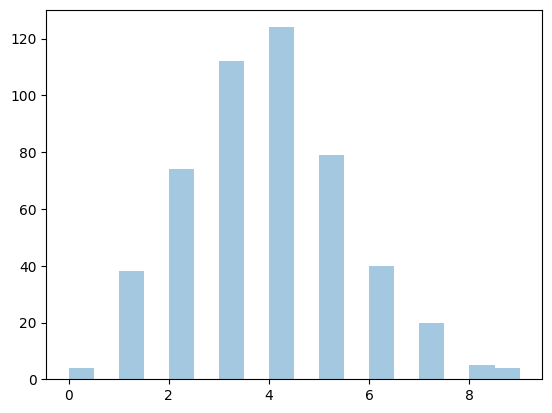

In [ ]:
#Visualize a Binomial Distribution
import seaborn as sns

sns.distplot(bi, hist=True, kde=False)


#The x-axis describes the number of successes during 15 trials
#and the y-axis displays the number of times each number of successes occurred during 500 experiments.

**Calculating Probabilities Using a Binomial Distribution**



 Nathan makes 60% of his free-throw attempts. If he shoots 12 free throws, what is the probability that he makes exactly 10?

In [ ]:
from scipy import stats

stats.binom.pmf(n=12, p=0.6, k=10)

#The probability that Nathan makes exactly 10 free throws is 0.0639.

0.06385228185600002

Marty flips a fair coin 5 times. What is the probability that the coin lands on heads 2 times or fewer?

In [ ]:
from scipy.stats import binom

binom.cdf(k=2, n=5, p=0.5)

0.5

It is known that 70% of individuals support a certain law. If 10 individuals are randomly selected, what is the probability that between 4 and 6 of them support the law?

In [ ]:
from scipy import stats as s

s.binom.cdf(n=10, p=0.7, k=6) - s.binom.cdf(n=10, p=0.7, k=4)

0.3030402942

# Poisson Distribution

**The Poisson distribution describes the probability of obtaining k successes during a given time interval.**

If a random variable X follows a Poisson distribution, then the probability that X = k successes can be found by the following formula:

**P(X=k) = λk * e– λ / k!**

where:

λ: mean number of successes that occur during a specific interval

k: number of successes

e: a constant equal to approximately 2.71828

In [ ]:
# Generating a Poisson Distribution
# syntax
# poisson.rvs(mu, size)      ---> mu= mean, size= sample size
from scipy.stats import poisson

po = poisson.rvs(mu=3, size=10)
print(po)

[0 3 3 3 3 5 4 5 6 4]


(array([0.00318841, 0.0173913 , 0.04318841, 0.13478261, 0.09913043,
        0.06869565, 0.04956522, 0.01507246, 0.0026087 , 0.00115942]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

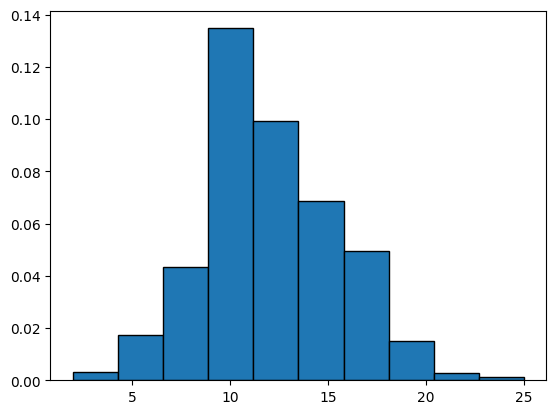

In [ ]:
#Visulaizing Poisson distribution

import matplotlib.pyplot as plt
from scipy.stats import poisson

po_1 = poisson.rvs(mu=12, size=1500)

plt.hist(po_1, density=True, edgecolor='black')

**Calculate Probabilities Using a Poisson Distribution**

**Syntax**

**poisson.pmf(k, mu)**

**poisson.cdf(k, mu)**

mu = mean

k = sample size

**Probability Equal to Some Value**

A store sells 3 apples per day on average. What is the probability that they will sell 5 apples on a given day?

In [ ]:
from scipy.stats import poisson

poisson.pmf(mu=3,k=5)

#The probability that the store sells 5 apples in a given day is 0.100819.

0.10081881344492458

**Probability Less than Some Value**

A certain store sells seven footballs per day on average. What is the probability that this store sells four or less footballs in a given day?

In [ ]:
poisson.cdf(mu=7 ,k=4)

#The probability that the store sells four or less footballs in a given day is 0.172992.

0.17299160788207146

**Probability Greater than Some Value**

A certain store sells 15 cans of tuna per day on average. What is the probability that this store sells more than 20 cans of tuna in a given day?

In [ ]:
1-poisson.cdf(mu=15, k=20)

#The probability that the store sells more than 20 cans of tuna in a given day is 0.082971.

0.08297091003146029

#Uniform Distribution

**A uniform distribution is a probability distribution in which every value between an interval from a to b is equally likely to be chosen.**

The probability that we will obtain a value between x1 and x2 on an interval from a to b can be found using the formula:

**P(obtain value between x1 and x2)  =  (x2 – x1) / (b – a)**

**Syntax**

**scipy.stats.uniform(x, loc, scale)**

where:

x: The value of the uniform distribution

loc: The minimum possible value

loc + scale: The maximum possible value

Suppose a bus shows up at a bus stop every 20 minutes. If you arrive at the bus stop, what is the probability that the bus will show up in 8 minutes or less?

In [ ]:
from scipy.stats import uniform

uniform.cdf(x=8, loc=0, scale=20) - uniform.cdf(x=0, loc=0, scale=20)

#The probability that the bus shows up in 8 minutes or less is 0.4.

0.4

The weight of a certain species of frog is uniformly distributed between 15 and 25 grams. If you randomly select a frog, what is the probability that the frog weighs between 17 and 19 grams?

In [ ]:
uniform.cdf(x=19, loc=15, scale=10) - uniform.cdf(x=17, loc=15, scale=10)

#The probability that the frog weighs between 17 and 19 grams is 0.2.

0.2

The length of an NBA game is uniformly distributed between 120 and 170 minutes. What is the probability that a randomly selected NBA game lasts more than 150 minutes?

In [ ]:
uniform.cdf(x=170, loc=120, scale=50) - uniform.cdf(x=150, loc=120, scale=50)

#The probability that a randomly selected NBA game lasts more than 150 minutes is 0.4.

0.4

#t Distribution

**The t distribution is a probability distribution that is similar to the normal distribution except it has heavier “tails” than the normal distribution.**

**That is, more values in the distribution are located in the tail ends than the center compared to the normal distribution**


In [ ]:
#Generating t distribution
#syntax
#t.rvs(df, size)         ---> df= degree of freedom,  size= sample size

from scipy.stats import t

t.rvs(df=6, size=10)

#The result is an array of 10 values that follow a t distribution with 6 degrees of freedom.

array([ 0.33519487, -0.47658778,  0.66290822,  1.35879207, -0.43930455,
        0.66451504, -0.88936472,  0.61251557, -0.01423978, -1.12487236])

(array([2.15598872e-04, 2.15598872e-04, 8.62395486e-04, 2.37158759e-03,
        4.74317518e-03, 2.19910849e-02, 7.67531983e-02, 2.50094691e-01,
        3.64793291e-01, 1.83690239e-01, 4.37665709e-02, 1.31515312e-02,
        4.74317518e-03, 1.94038984e-03, 4.31197743e-04, 2.15598872e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.15598872e-04]),
 array([-8.54625813, -7.51553741, -6.4848167 , -5.45409599, -4.42337528,
        -3.39265457, -2.36193386, -1.33121315, -0.30049244,  0.73022827,
         1.76094898,  2.79166969,  3.82239041,  4.85311112,  5.88383183,
         6.91455254,  7.94527325,  8.97599396, 10.00671467, 11.03743538,
        12.06815609]),
 <BarContainer object of 20 artists>)

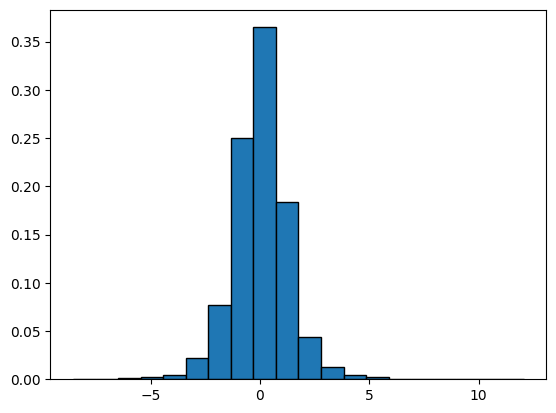

In [ ]:
#visualzing t distribution

l = t.rvs(df=5, size=4500)
plt.hist(l,density=True, edgecolor='black', bins=20)

<Axes: ylabel='Density'>

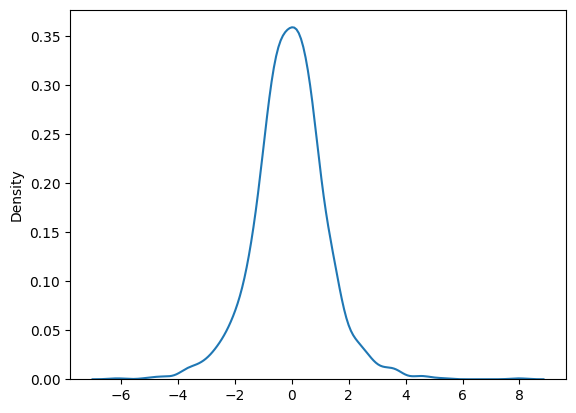

In [ ]:
sns.kdeplot(l)

#Normal Distribution



**synatx**

**np.random.normal(loc=0.0, scale=1.0, size=None)**

where:

loc: Mean of the distribution. Default is 0.

scale: Standard deviation of the distribution. Default is 1.

size: Sample size.

In [ ]:
import numpy as np

no = np.random.normal(loc=0, scale=1, size=1500)
no

array([ 0.84716376, -2.00157543,  0.67868565, ..., -1.39606793,
        1.15647405, -2.20058556])

(array([  3.,   3.,   3.,   7.,  11.,  20.,  28.,  35.,  61.,  86.,  83.,
        117., 129., 139., 139., 118., 109., 121.,  89.,  59.,  50.,  36.,
         17.,  13.,   9.,   5.,   6.,   3.,   0.,   1.]),
 array([-3.33444921, -3.09929274, -2.86413627, -2.62897979, -2.39382332,
        -2.15866685, -1.92351038, -1.68835391, -1.45319744, -1.21804097,
        -0.9828845 , -0.74772803, -0.51257155, -0.27741508, -0.04225861,
         0.19289786,  0.42805433,  0.6632108 ,  0.89836727,  1.13352374,
         1.36868021,  1.60383669,  1.83899316,  2.07414963,  2.3093061 ,
         2.54446257,  2.77961904,  3.01477551,  3.24993198,  3.48508845,
         3.72024492]),
 <BarContainer object of 30 artists>)

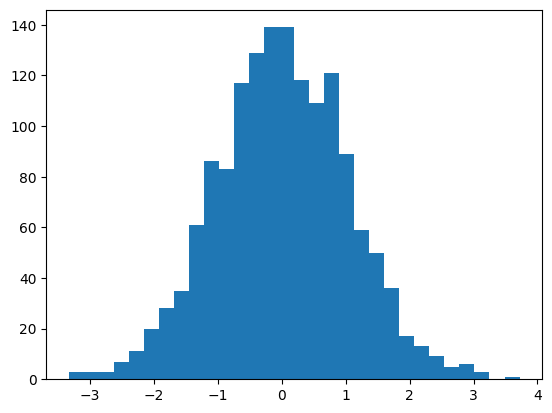

In [ ]:
plt.hist(no, bins=30)

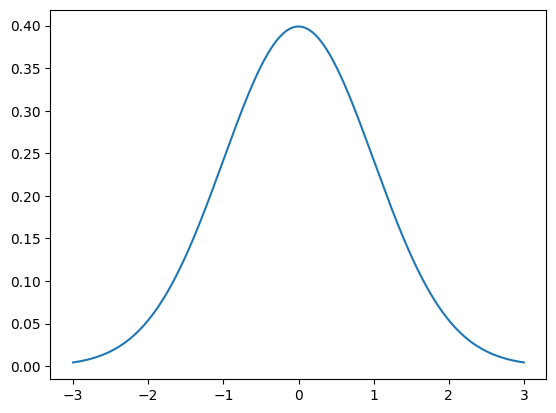

In [ ]:
#x-axis ranges from -3 and 3 with .001 steps
from scipy.stats import norm
x = np.arange(-3, 3, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 0, 1))

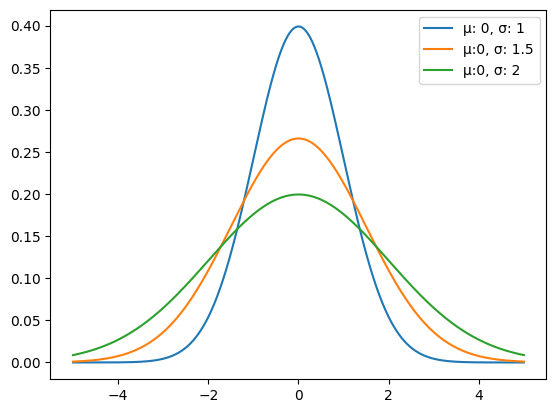

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')

#add legend to plot
plt.legend()

#CDF

**A cumulative distribution function (CDF) tells us the probability that a random variable takes on a value less than or equal to some value.**

In [ ]:
from scipy.stats import norm

#calculate probability that random value is less than 1.96 in normal CDF
norm.cdf(1.96)

#The probability that a random variables takes on a value less than 1.96 in a standard normal distribution is roughly 0.975.

0.9750021048517795

In [ ]:
#We can also find the probability that a random variable takes on a value greater than 1.96 by simply subtracting this value from 1:
from scipy.stats import norm

#calculate probability that random value is greater than 1.96 in normal CDF
1 - norm.cdf(1.96)

#The probability that a random variables takes on a value greater than 1.96 in a standard normal distribution is roughly 0.025.

0.024997895148220484

**Plot the Normal CDF**

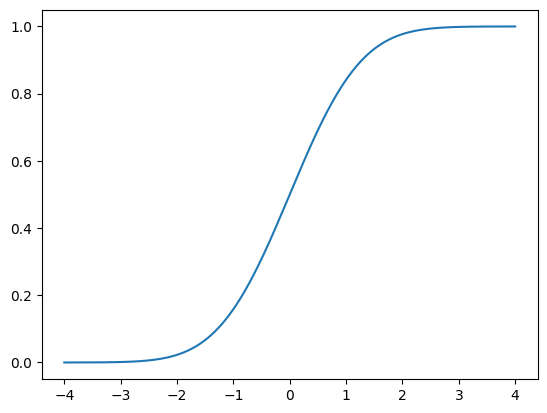

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

#define x and y values to use for CDF
x = np.linspace(-4, 4, 1000)
y = ss.norm.cdf(x)

#plot normal CDF
plt.plot(x, y)

#The x-axis shows the values of a random variable that follows a standard normal distribution and
#the y-axis shows the probability that a random variable takes on a value less than the value shown on the x-axis.

#For example, if we look at x = 1.96 then we’ll see that the cumulative probability that x is less than 1.96 is roughly 0.975.

#Chi-Square Distribution



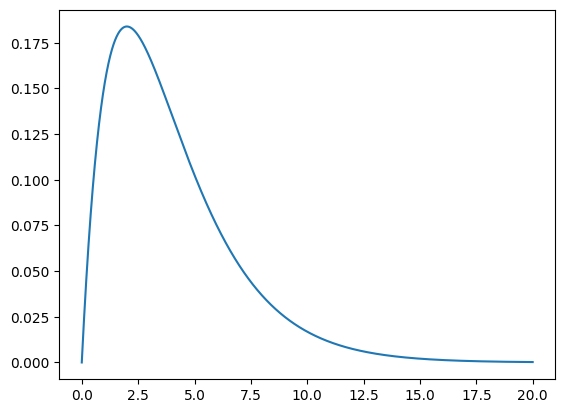

In [ ]:
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=4))

**Plot a Single Chi-Square Distribution**

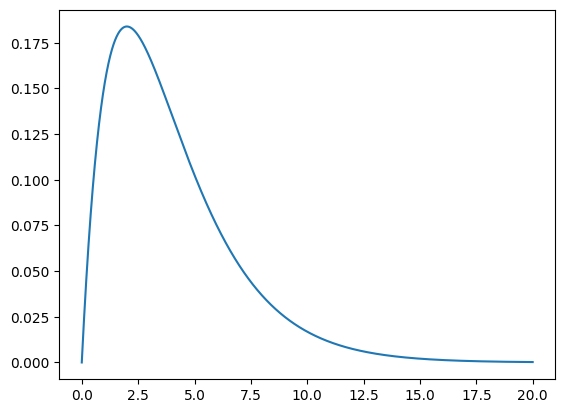

In [ ]:
#The following code shows how to plot a single Chi-square distribution curve with 4 degrees of freedom

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=4))

**Plot Multiple Chi-Square Distributions**

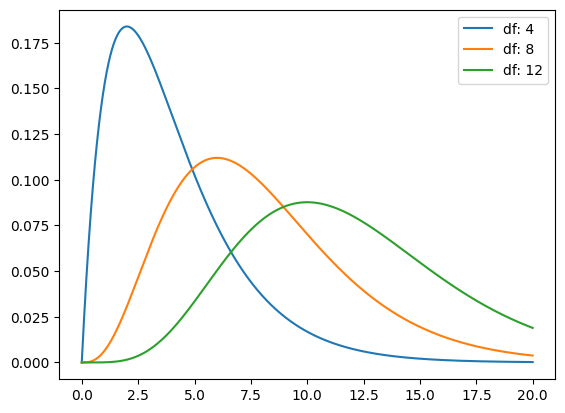

In [ ]:
#The following code shows how to plot multiple Chi-square distribution curves with different degrees of freedom:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12')

#add legend to plot
plt.legend()

#Hypothesis Testing

**A hypothesis test is a formal statistical test we use to reject or fail to reject some statistical hypothesis.**



One sample t-test

Two sample t-test

Paired samples t-test

**One Sample t-test**

**A one sample t-test is used to test whether or not the mean of a population is equal to some value.**

For example, suppose we want to know whether or not the mean weight of a certain species of some turtle is equal to 310 pounds.

To test this, we go out and collect a simple random sample of turtles with the following weights:

Weights: 300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303

The following code shows how to use the ttest_1samp() function from the scipy.stats library to perform a one sample t-test:

**syntax**

**ttest_1samp(a, popmean)**

where:

a: an array of sample observations

popmean: the expected population mean

In [ ]:
import scipy.stats as stats

#define data
data = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]

#perform one sample t-test
stats.ttest_1samp(a=data, popmean=310)


#The t test statistic is -1.5848 and the corresponding two-sided p-value is 0.1389.

#The two hypotheses for this particular one sample t-test are as follows:

#H0: µ = 310 (the mean weight for this species of turtle is 310 pounds)
#HA: µ ≠310 (the mean weight is not 310 pounds)
#Because the p-value of our test (0.1389) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.

#We do not have sufficient evidence to say that the mean weight for this particular species of turtle is different from 310 pounds.

TtestResult(statistic=-1.5848116313861254, pvalue=0.1389944275158753, df=12)

**Two Sample t-test**

**A two sample t-test is used to test whether or not the means of two populations are equal.**

For example, suppose we want to know whether or not the mean weight between two different species of turtles is equal.

To test this, we collect a simple random sample of turtles from each species with the following weights:

Sample 1: 300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303

Sample 2: 335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305

The following code shows how to use the ttest_ind() function from the scipy.stats library to perform this two sample t-test:

**Syntax**

**ttest_ind(a, b, equal_var=True)**

where:

a: an array of sample observations for group 1

b: an array of sample observations for group 2

equal_var: if True, perform a standard independent 2 sample t-test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.


Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1.


find variance for each group

print(np.var(group1), np.var(group2))

Suppose we got  --> 7.73, 12.26

The ratio of the larger sample variance to the smaller sample variance is 12.26 / 7.73 = 1.586, which is less than 4. This means we can assume that the population variances are equal.


Thus, we can proceed to perform the two sample t-test with equal variances:

In [ ]:
import scipy.stats as stats

#define array of turtle weights for each sample
sample1 = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
sample2 = [335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305]

#perform two sample t-test
stats.ttest_ind(a=sample1, b=sample2)



#The t test statistic is –2.1009 and the corresponding two-sided p-value is 0.0463.

#The two hypotheses for this particular two sample t-test are as follows:

#H0: µ1 = µ2 (the mean weight between the two species is equal)
#HA: µ1 ≠ µ2 (the mean weight between the two species is not equal)
#Since the p-value of the test (0.0463) is less than .05, we reject the null hypothesis.

3This means we have sufficient evidence to say that the mean weight between the two species is not equal.

TtestResult(statistic=-2.10090292575557, pvalue=0.04633501389516513, df=24.0)

**Paired Samples t-test**

**A paired samples t-test is used to compare the means of two samples when each observation in one sample can be paired with an observation in the other sample.**

For example, suppose we want to know whether or not a certain training program is able to increase the max vertical jump (in inches) of basketball players.

To test this, we may recruit a simple random sample of 12 college basketball players and measure each of their max vertical jumps. Then, we may have each player use the training program for one month and then measure their max vertical jump again at the end of the month.

The following data shows the max jump height (in inches) before and after using the training program for each player:

Before: 22, 24, 20, 19, 19, 20, 22, 25, 24, 23, 22, 21

After: 23, 25, 20, 24, 18, 22, 23, 28, 24, 25, 24, 20

The following code shows how to use the ttest_rel() function from the scipy.stats library to perform this paired samples t-test:



**Syntax**

**ttest_rel(a, b)**

where:

a: an array of sample observations from group 1

b: an array of sample observations from group 2

In [ ]:
import scipy.stats as stats

#define before and after max jump heights
before = [22, 24, 20, 19, 19, 20, 22, 25, 24, 23, 22, 21]
after = [23, 25, 20, 24, 18, 22, 23, 28, 24, 25, 24, 20]

#perform paired samples t-test
stats.ttest_rel(a=before, b=after)




#The t test statistic is –2.5289 and the corresponding two-sided p-value is 0.0280.

#The two hypotheses for this particular paired samples t-test are as follows:

#H0: µ1 = µ2 (the mean jump height before and after using the program is equal)
#HA: µ1 ≠ µ2 (the mean jump height before and after using the program is not equal)
#Since the p-value of the test (0.0280) is less than .05, we reject the null hypothesis.

#This means we have sufficient evidence to say that the mean jump height before and after using the training program is not equal.

TtestResult(statistic=-2.5289026942943655, pvalue=0.02802807458682508, df=11)

#Z-Tests


**statsmodels.stats.weightstats.ztest(x1, x2=None, value=0)**

where:

x1: values for the first sample

x2: values for the second sample (if performing a two sample z-test)

value: mean under the null (in one sample case) or mean difference (in two sample case)

**One Sample Z-Test in Python**

Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15.

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.

The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels:

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest(data, value=100)



#The test statistic for the one sample z-test is 1.5976 and the corresponding p-value is 0.1101.

#Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis.
#In other words, the new drug does not significantly affect IQ level.

(1.5976240527147705, 0.1101266701438426)

**Two Sample Z-Test**


Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

The following code shows how to perform a two sample z-test in Python to determine if the mean IQ level is different between the two cities:

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0)



#The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

#Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis.
#In other words, the mean IQ level is significantly different between the two cities.



(-1.9953236073282115, 0.046007596761332065)

**One Proportion Z-Test**

**A one proportion z-test is used to compare an observed proportion to a theoretical one.**

This test uses the following null hypotheses:

H0: p = p0 (population proportion is equal to hypothesized proportion p0)

The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

H1 (two-tailed): p ≠ p0 (population proportion is not equal to some hypothesized value p0)

H1 (left-tailed): p < p0 (population proportion is less than some hypothesized value p0)

H1 (right-tailed): p > p0 (population proportion is greater than some hypothesized value p0)


The test statistic is calculated as:

z = (p-p0) / √p0(1-p0)/n

where:

p: observed sample proportion

p0: hypothesized population proportion

n: sample size

If the p-value that corresponds to the test statistic z is less than your chosen significance level (common choices are 0.10, 0.05, and 0.01) then you can reject the null hypothesis.

**syntax**

**proportions_ztest(count, nobs, value=None, alternative=’two-sided’)**

where:

count: The number of successes

nobs: The number of trials

value: The hypothesized population proportion

alternative: The alternative hypothesis


This function returns a z test-statistic and a corresponding p-value.

Suppose we want to know whether or not the proportion of residents in a certain county who support a certain law is equal to 60%. To test this, we collect the following data on a random sample:

p0: hypothesized population proportion = 0.60

x: residents who support law: 64

n: sample size = 100

In [ ]:
#import proportions_ztest function
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
proportions_ztest(count=60, nobs=100, value=0.64)



#From the output we can see that the z test-statistic is -0.8165 and the corresponding p-value is 0.4142.
#Since this value is not less than α = 0.05, we fail to reject the null hypothesis.
#We do not have sufficient evidence to say that the proportion of residents who support the law is different from 0.60.

(-0.8164965809277268, 0.41421617824252466)

#Binomial Test

**A binomial test compares a sample proportion to a hypothesized proportion.**

For example, suppose we have a 6-sided die. If we roll it 12 times, we would expect the number “3” to show up 1/6 of the time, which would be 12 * (1/6) = 2 times.

If the number “3” actually shows up 4 times, is that evidence that the die is biased towards the number “3”? We could perform a binomial test to answer that question.

**syntax**

**binom_test(x, n=None, p=0.5, alternative=’two-sided’)**

where:

x: number of “successes”

n: total number of trials

p: the probability of success on each trial

alternative: the alternative hypothesis. Default is ‘two-sided’ but you can also specify ‘greater’ or ‘less.’

This function returns the p-value of the test.

We roll a 6-sided die 24 times and it lands on the number “3” exactly 6 times. Perform a binomial test to determine if the die is biased towards the number “3.”

The null and alternative hypotheses for our test are as follows:

H0: π ≤ 1/6 (the die is not biased towards the number “3”)

HA: π > 1/6

*π is the symbol for population proportion.

In [ ]:
from scipy.stats import binom_test

binom_test(x=6, n=24, p=1/6, alternative='greater')


#Because this p-value (0.1995) is not less than 0.05, we fail to reject the null hypothesis.
#We do not have sufficient evidence to say the die is biased towards the number “3.”

<ipython-input-129-592e1902309e>:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=6, n=24, p=1/6, alternative='greater')


0.1995295129479585

We flip a coin 30 times and it lands on heads exactly 19 times. Perform a binomial test to determine if the coin is biased towards heads.

The null and alternative hypotheses for our test are as follows:

H0: π ≤ 1/2 (the coin is not biased towards heads)

HA: π > 1/2

In [ ]:
binom_test(x=19, n=30, p=1/2, alternative='greater')

#Because this p-value (0.10024) is not less than 0.05, we fail to reject the null hypothesis.
#We do not have sufficient evidence to say the coin is biased towards heads.

<ipython-input-130-582ac0dfb541>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=19, n=30, p=1/2, alternative='greater')


0.10024421103298667

A shop makes widgets with 80% effectiveness. They implement a new system that they hope will improve the rate of effectiveness. They randomly select 50 widgets from a recent production run and find that 47 of them are effective. Perform a binomial test to determine if the new system leads to higher effectiveness.

The null and alternative hypotheses for our test are as follows:

H0: π ≤ 0.80 (the new system does not lead to an increase in effectiveness)


HA: π > 0.80



In [ ]:
binom_test(x=47, n=50, p=0.8, alternative='greater')


#Because this p-value (0.00565) is less than 0.05, we reject the null hypothesis.
#We have sufficient evidence to say the new system leads to an increase in effectiveness.

<ipython-input-131-432cef4d7220>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=47, n=50, p=0.8, alternative='greater')


0.005656361012155317

#Confidence Intervals


**A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of confidence.**

It is calculated as:

Confidence Interval = x  +/-  t*(s/√n)

where:

x: sample mean

t: t-value that corresponds to the confidence level

s: sample standard deviation

n: sample size

**The way to interpret this confidence interval is as follows:**

95% confidence interval = (16.758, 24.042)


There is a 95% chance that the confidence interval of [16.758, 24.042] contains the true population mean height of plants.



Another way of saying the same thing is that there is only a 5% chance that the true population mean lies outside of the 95% confidence interval. That is, there’s only a 5% chance that the true population mean height of plants is less than 16.758 inches or greater than 24.042 inches.



**Confidence Intervals Using the t Distribution**


If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

The following example shows how to calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 15 plants:

In [ ]:
pip install --upgrade scipy


In [ ]:
import numpy as np
import scipy.stats as st

#define sample data
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
#st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))

#The 95% confidence interval for the true population mean height is (16.758, 24.042).

(16.75776979778498, 24.042230202215016)

**Confidence Intervals Using the Normal Distribution**


If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [ ]:
import numpy as np
import scipy.stats as st

#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)

#create 95% confidence interval for population mean weight
#st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
st.norm.interval(0.95, np.mean(data), st.sem(data))


#The 95% confidence interval for the true population mean height is (17.40, 21.08).

(17.400060940568054, 21.079939059431943)

**Plot a Confidence Interval**

**Plotting Confidence Intervals Using lineplot()**

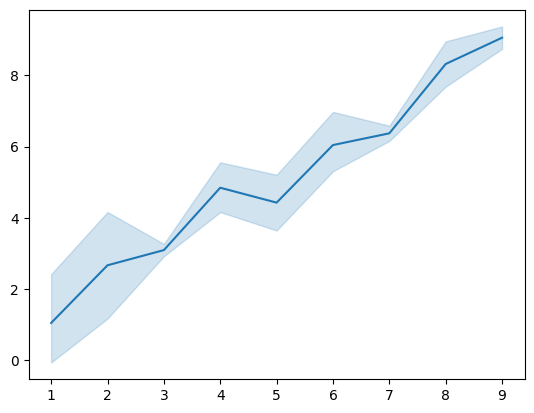

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#create some random data
np.random.seed(0)
x = np.random.randint(1, 10, 30)
y = x + np.random.normal(0, 1, 30)

#create lineplot
sns.lineplot(x=x, y=y)

# Show the plot
plt.show()


<ipython-input-144-fa8dba0dc787>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 80)` for the same effect.

  sns.lineplot(x=x, y=y, ci=80)


<Axes: >

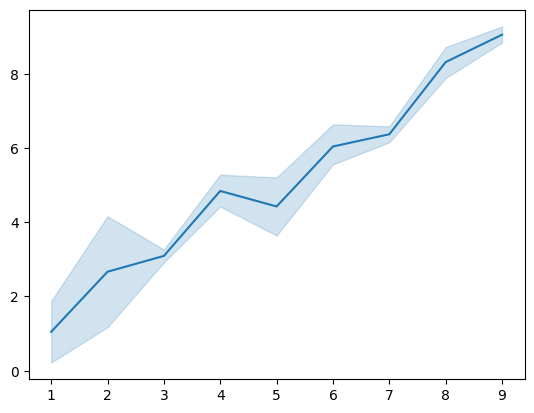

In [ ]:
#By default, the lineplot() function uses a 95% confidence interval but can specify the confidence level to use with the ci command.

sns.lineplot(x=x, y=y, ci=80)

**Plotting Confidence Intervals Using regplot()**

<Axes: >

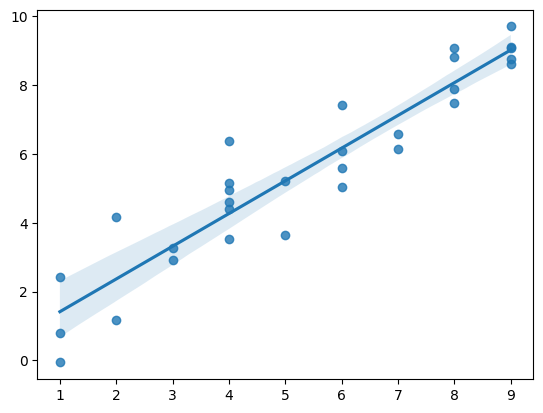

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#create some random data
np.random.seed(0)
x = np.random.randint(1, 10, 30)
y = x+np.random.normal(0, 1, 30)

#create regplot
sns.regplot(x=x, y=y)

<Axes: >

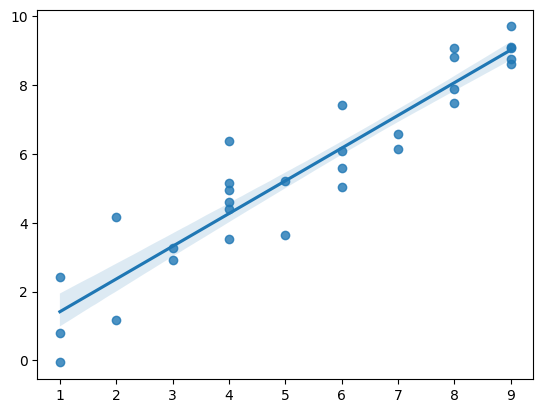

In [ ]:
#Similar to lineplot(), the regplot() function uses a 95% confidence interval by default but can specify the confidence level to use with the ci command

sns.regplot(x=x, y=y, ci=80)

#ANOVA




**One-Way ANOVA**

A one-way ANOVA (“analysis of variance”) is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.


A researcher recruits 30 students to participate in a study. The students are randomly assigned to use one of three studying techniques for the next three weeks to prepare for an exam. At the end of the three weeks, all of the students take the same test.

Use the following steps to perform a one-way ANOVA to determine if the average scores are the same across all three groups.

In [ ]:
from scipy.stats import f_oneway

#enter exam scores for each group
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

#perform one-way ANOVA
f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

A one-way ANOVA uses the following null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (all the population means are equal)

H1 (null hypothesis): at least one population mean is different from the rest

The F test statistic is 2.3575 and the corresponding p-value is 0.1138. Since the p-value is not less than .05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that there is a difference in exam scores among the three studying techniques.

**Two-way ANOVA**

A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.

The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches.

Use the following steps to perform a two-way ANOVA to determine if watering frequency and sunlight exposure have a significant effect on plant growth, and to determine if there is any interaction effect between watering frequency and sunlight exposure.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})



#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


We can see the following p-values for each of the factors in the table:

water: p-value = .000527

sun: p-value = .0000002

water*sun: p-value = .120667

Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

Note: Although the ANOVA results tell us that watering frequency and sunlight exposure have a statistically significant effect on plant height, we would need to perform post-hoc tests to determine exactly how different levels of water and sunlight affect plant height.

**Three-way ANOVA**

A three-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on three factors.

Suppose a researcher wants to determine if two training programs lead to different mean improvements in jumping height among college basketball players.

The researcher suspects that gender and division (Division I or II) may also affect jumping height so he collects data for these factors as well.

His goal is to perform a three-way ANOVA to determine how training program, gender, and division affect jumping height.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#create DataFrame
df = pd.DataFrame({'program': np.repeat([1, 2], 20),
                   'gender': np.tile(np.repeat(['M', 'F'], 10), 2),
                   'division': np.tile(np.repeat([1, 2], 5), 4),
                   'height': [7, 7, 8, 8, 7, 6, 6, 5, 6, 5,
                              5, 5, 4, 5, 4, 3, 3, 4, 3, 3,
                              6, 6, 5, 4, 5, 4, 5, 4, 4, 3,
                              2, 2, 1, 4, 4, 2, 1, 1, 2, 1]})



#perform three-way ANOVA
model = ols("""height ~ C(program) + C(gender) + C(division) +
               C(program):C(gender) + C(program):C(division) + C(gender):C(division) +
               C(program):C(gender):C(division)""", data=df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(program),3.610000e+01,1.0,6.563636e+01,2.983934e-09
C(gender),6.760000e+01,1.0,1.229091e+02,1.714432e-12
C(division),1.960000e+01,1.0,3.563636e+01,1.185218e-06
C(program):C(gender),3.466674e-31,1.0,6.303043e-31,1.000000e+00
C(program):C(division),4.000000e-01,1.0,7.272727e-01,4.001069e-01
C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
C(program):C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
Residual,1.760000e+01,32.0,NaN,NaN


The Pr(>F) column shows the p-value for each individual factor and the interactions between the factors.

From the output we can see that none of the interactions between the three factors were statistically significant.

We can also see that each of the three factors (program, gender, and division) were statistically significant with the following p-values:



P-value of program: 0.00000000298

P-value of gender: 0.00000000000171

P-value of division: 0.00000185

In conclusion, we would state that training program, gender, and division are all significant predictors of the jumping height increase among players.

We would also state that there are no significant interaction effects between these three factors.